# Assignment 5

In [37]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [38]:
data = pd.read_csv("./Datasets/Social_Network_Ads.csv")

In [39]:
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [40]:
data.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [41]:
data.isna().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

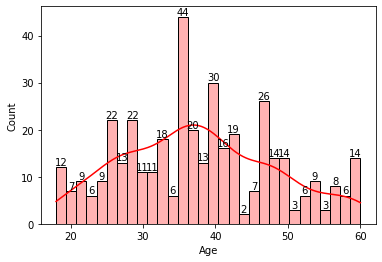

In [42]:
histplot = sns.histplot(data['Age'], kde=True, bins=30, color='red', alpha=0.3)
for i in histplot.containers:
    histplot.bar_label(i,)
plt.show()

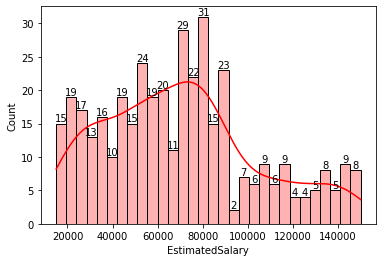

In [43]:
histplot = sns.histplot(data['EstimatedSalary'], kde=True, bins=30, color='red', alpha=0.3)
for i in histplot.containers:
    histplot.bar_label(i,)
plt.show()

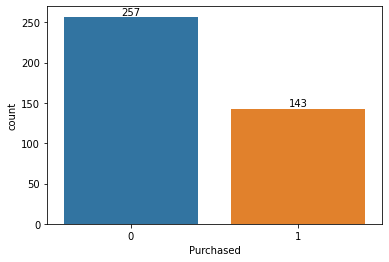

In [44]:
countplot = sns.countplot(data['Purchased'])
for i in countplot.containers:
    countplot.bar_label(i,)
plt.show()

In [45]:
data["Gender"].value_counts()

Female    204
Male      196
Name: Gender, dtype: int64

In [46]:
def gender_encoder(value):
    if (value == "Male"):
        return 1
    elif (value == "Female"):
        return 0
    else:
        return -1

In [47]:
data['Gender'] = data['Gender'].apply(gender_encoder)

In [48]:
data["Purchased"].value_counts()

0    257
1    143
Name: Purchased, dtype: int64

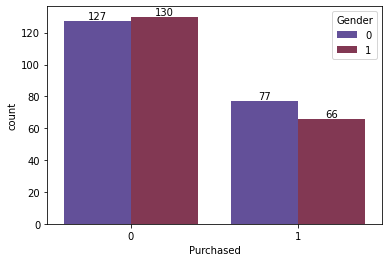

In [49]:
countplot = sns.countplot(data["Purchased"], hue=data["Gender"], palette="twilight")
for i in countplot.containers:
    countplot.bar_label(i,)
plt.show()

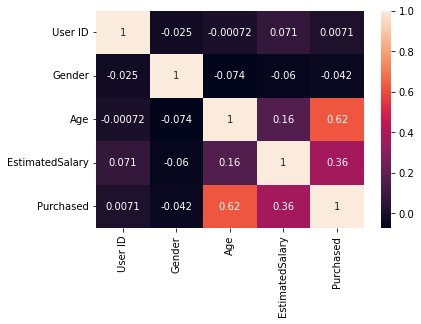

In [50]:
sns.heatmap(data.corr(), annot=True)
plt.show()

In [51]:
data = data.drop('User ID', axis=1)

In [52]:
data['Purchased'].value_counts()

0    257
1    143
Name: Purchased, dtype: int64

In [53]:
X = data[["Age", "EstimatedSalary"]]
y = data['Purchased']

## Data Preprocessing

In [54]:
scaler = StandardScaler()
x = scaler.fit_transform(X)

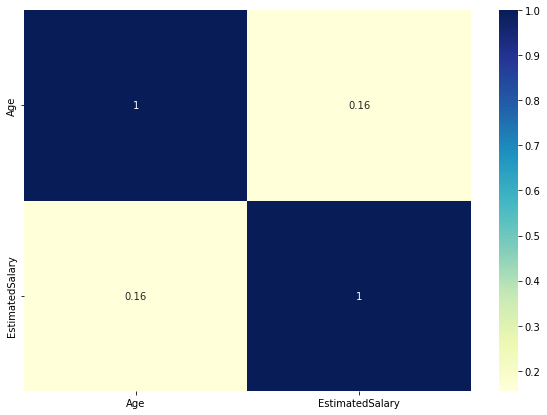

In [55]:
plt.figure(figsize=(10, 7))
sns.heatmap(X.corr(), annot=True, cmap='YlGnBu')
plt.show()

In [56]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [57]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((320, 2), (80, 2), (320,), (80,))

## Model Building

### 1. Logistic Regression

In [58]:
model = LogisticRegression(n_jobs=-1)

In [59]:
model.fit(X_train, y_train)

LogisticRegression(n_jobs=-1)

In [60]:
y_pred = model.predict(X_test)

In [61]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[50  2]
 [ 9 19]]


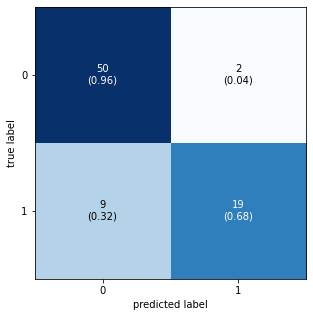

In [62]:
plot_confusion_matrix(conf_mat=cm, figsize=(5,5), show_normed=True)
plt.show()

In [63]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.96      0.90        52
           1       0.90      0.68      0.78        28

    accuracy                           0.86        80
   macro avg       0.88      0.82      0.84        80
weighted avg       0.87      0.86      0.86        80



In [64]:
accuracy_score(y_test, y_pred)

0.8625

In [65]:
1-accuracy_score(y_test, y_pred)

0.13749999999999996

In [66]:
f1_score(y_test, y_pred)

0.7755102040816326

In [67]:
precision_score(y_test, y_pred)

0.9047619047619048

In [68]:
recall_score(y_test, y_pred)

0.6785714285714286

### 2. Support Vector Machine

In [113]:
model_2 = SVC(kernel='rbf', C=10.0, random_state=1)

In [114]:
model_2.fit(X_train, y_train)

SVC(C=10.0, random_state=1)

In [115]:
y_pred = model_2.predict(X_test)

In [116]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[47  5]
 [ 1 27]]


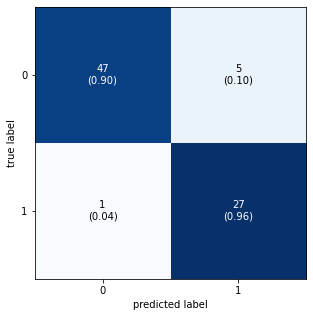

In [117]:
plot_confusion_matrix(conf_mat=cm, figsize=(5,5), show_normed=True)
plt.show()

In [118]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.90      0.94        52
           1       0.84      0.96      0.90        28

    accuracy                           0.93        80
   macro avg       0.91      0.93      0.92        80
weighted avg       0.93      0.93      0.93        80



In [119]:
accuracy_score(y_test, y_pred)

0.925

In [120]:
1-accuracy_score(y_test, y_pred)

0.07499999999999996

In [121]:
f1_score(y_test, y_pred)

0.8999999999999999

In [122]:
precision_score(y_test, y_pred)

0.84375

In [123]:
recall_score(y_test, y_pred)

0.9642857142857143